In [274]:
#import all the packages needed
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns 
import statsmodels.formula.api as smf 
import sklearn.linear_model

#importing the dataset
file = 'D:/Formazione/Hult/MSBA/2- Machine Learning/Assignment/Apprentice_Chef_Dataset.xlsx'

original_df = pd.read_excel(io = file)
df_work = original_df.copy()
df_work= df_work.rename(columns=str.lower)

#showing the dataset head
df_work.head(10)

,revenue,cross_sell_success,name,email,first_name,family_name,total_meals_ordered,unique_meals_purch,contacts_w_customer_service,product_categories_viewed,...,early_deliveries,late_deliveries,package_locker,refrigerated_locker,avg_prep_vid_time,largest_order_size,master_classes_attended,median_meal_rating,avg_clicks_per_visit,total_photos_viewed
0,393.00,1,Saathos,saathos@unitedhealth.com,Saathos,Saathos,14,6,12,10,...,0,2,0,0,33.4,1,0,1,17,0
1,1365.00,1,Alysanne Osgrey,alysanne.osgrey@ge.org,Alysanne,Osgrey,87,3,8,8,...,0,2,0,0,84.8,1,0,3,13,170
2,800.00,1,Edwyd Fossoway,edwyd.fossoway@jnj.com,Edwyd,Fossoway,15,7,11,5,...,0,1,0,0,63.0,1,0,2,16,0
3,600.00,1,Eleyna Westerling,eleyna.westerling@ge.org,Eleyna,Westerling,13,6,11,5,...,0,3,0,0,43.8,1,0,2,14,0
4,1490.00,1,Elyn Norridge,elyn.norridge@jnj.com,Elyn,Norridge,47,8,6,10,...,0,8,0,0,84.8,1,1,3,12,205
5,1550.00,1,Genna Lannister,genna.lannister@protonmail.com,Genna,Lannister,36,2,9,1,...,0,3,1,0,78.8,1,1,3,12,0
6,1430.00,1,Olene Tyrell,olene.tyrell@mcdonalds.com,Olene,Tyrell,61,7,6,2,...,1,2,1,1,84.8,1,0,3,12,169
7,1321.25,1,Stevron Frey,stevron.frey@travelers.com,Stevron,Frey,13,1,12,3,...,0,0,0,0,63.0,1,0,1,15,0
8,1505.00,1,Praed,praed@nike.com,Praed,Praed,16,1,12,5,...,0,1,0,0,63.0,1,0,2,18,0
9,1493.00,0,Alysane Mormont,alysane.mormont@caterpillar.com,Alysane,Mormont,95,3,6,8,...,0,2,1,0,84.8,1,1,3,14,147


In [275]:
#MISSING VALUES

#checking for missing data
print("\n missing values:\n\n",df_work.isnull().sum())
#the only NAs come from the column 'family_name'

#looking at the column 'family_name'
#counting the frequency of the values
from collections import Counter
print("\n\nfrequency of values in 'family_name'\n\n", 
      Counter(df_work['family_name']).values() )

#the column 'family_name' has too many categories to be properly used
#it doesn't seem feasible to work on the names for any further analysis

#no need to deal with missing data: just avoid to use the column 'family_name'


#CHEK ON DATA

#is the column "largest_order_size" really  the average order size?
average_order_size = df_work['total_meals_ordered'] / df_work['unique_meals_purch']
diff_check = df_work['largest_order_size'] - average_order_size
print("\n\nthe difference between the calulated averages and the given averages is not equal to zero:\n\n"
      ,diff_check.head())
#there must be something I don't understand here, further analysis needed 


 missing values:

 revenue                         0
cross_sell_success              0
name                            0
email                           0
first_name                      0
family_name                    47
total_meals_ordered             0
unique_meals_purch              0
contacts_w_customer_service     0
product_categories_viewed       0
avg_time_per_site_visit         0
mobile_number                   0
cancellations_before_noon       0
cancellations_after_noon        0
tastes_and_preferences          0
pc_logins                       0
mobile_logins                   0
weekly_plan                     0
early_deliveries                0
late_deliveries                 0
package_locker                  0
refrigerated_locker             0
avg_prep_vid_time               0
largest_order_size              0
master_classes_attended         0
median_meal_rating              0
avg_clicks_per_visit            0
total_photos_viewed             0
dtype: int64


frequency of 

In [276]:
df_work = df_work.drop(columns = ['name', 'family_name'])

print(df_work.columns)


Index(['revenue', 'cross_sell_success', 'email', 'first_name',
       'total_meals_ordered', 'unique_meals_purch',
       'contacts_w_customer_service', 'product_categories_viewed',
       'avg_time_per_site_visit', 'mobile_number', 'cancellations_before_noon',
       'cancellations_after_noon', 'tastes_and_preferences', 'pc_logins',
       'mobile_logins', 'weekly_plan', 'early_deliveries', 'late_deliveries',
       'package_locker', 'refrigerated_locker', 'avg_prep_vid_time',
       'largest_order_size', 'master_classes_attended', 'median_meal_rating',
       'avg_clicks_per_visit', 'total_photos_viewed'],
      dtype='object')


In [277]:
#COEFFICIENTS GROUPING ['email']

#with the column 'first_name' it could have been possible to create a gender 
#guesser but the names are all archaic and not being able to find a proper training
#dataset, the model would be unuseful
#columns 'family_name', as previously explained, and 'name' (for similar 
#reasons)are not useful for the incoming models

#creating a dataset for the potential coefficients of the model and the output
X =['cross_sell_success', 'email','total_meals_ordered', 'unique_meals_purch',
    'contacts_w_customer_service','product_categories_viewed',
    'avg_time_per_site_visit','mobile_number', 'cancellations_before_noon',
    'cancellations_after_noon', 'tastes_and_preferences','pc_logins',
    'mobile_logins', 'weekly_plan', 'early_deliveries', 'late_deliveries',
    'package_locker','refrigerated_locker', 'avg_prep_vid_time',
    'largest_order_size', 'master_classes_attended', 'median_meal_rating',
    'avg_clicks_per_visit', 'total_photos_viewed']

Y_log = np.log10(df_work["revenue"])

#grouping the email domain
df_work[['name_mail','domain']] = df_work.email.str.split("@",expand=True)
df_work['domain'] = '@' + df_work['domain'].astype(str)
df_work = df_work.drop(columns = [ 'email', 'name_mail'])
#cheking the frequency of the mails
print("\n\nfrequency of values in 'domain'\n\n", 
      Counter(df_work['domain']))
#the only domains that may remain stand alone are  
# @gmail.com : 303 entries
# @protonmail.com: 284 entries
# @yahoo.com: 274 entries

#proceeding with the grouping according to the groups provided by the case
professional_list = ["@mmm.com", "@amex.com", "@apple.com", "@boing.com", 
                     "@caterpillar.com", "@chevron.com", "@cisco.com", 
                     "@cocacola.com", "@disney.com", "@dupont.com",
                     "@exxon.com", "@ge.org", "@goldmansacs.com", 
                     "@homedepot.com", "@ibm.com", "@intel.com","@jnj.com", 
                     "@jpmorgan.com", "@mcdonalds.com", "@merck.com", 
                     "@microsoft.com", "@nike.com", "@pfizer.com", 
                     "@pg.com", "@travelers.com", "@unitedtech.com", 
                     "@verizon.com", "@visa.com", "@walmart.com", 
                     "@unitedhealth.com", "@boeing.com"]

personal_list = ["@gmail.com", "@yahoo.com", "@protonmail.com"]
junk_list = ["@me.com", "@aol.com", "@hotmail.com", "@live.com", 
             "@msn.com", "@passport.com"]

for i in range(len(df_work)):
    domain_i = df_work.loc[i, 'domain']
    if domain_i in professional_list:
        df_work.loc[i, 'domain_group'] = "professional"
    elif domain_i in personal_list:
        df_work.loc[i, 'domain_group'] = "personal"
    elif domain_i in junk_list:
        df_work.loc[i, 'domain_group'] = "junk"
    else:
        df_work.loc[i, 'domain_group'] = "unknown"

#cheking the result
print("\n\nfrequency of values in 'domain_group:|n ", 
      Counter(df_work['domain_group']))




frequency of values in 'domain'

 Counter({'@gmail.com': 303, '@protonmail.com': 284, '@yahoo.com': 274, '@msn.com': 72, '@aol.com': 69, '@passport.com': 64, '@hotmail.com': 63, '@live.com': 62, '@me.com': 59, '@amex.com': 30, '@jnj.com': 28, '@mcdonalds.com': 28, '@cocacola.com': 28, '@merck.com': 28, '@nike.com': 27, '@apple.com': 27, '@ge.org': 26, '@ibm.com': 26, '@dupont.com': 26, '@chevron.com': 25, '@microsoft.com': 25, '@unitedhealth.com': 24, '@travelers.com': 24, '@exxon.com': 24, '@boeing.com': 23, '@caterpillar.com': 22, '@mmm.com': 22, '@pg.com': 22, '@verizon.com': 22, '@disney.com': 21, '@walmart.com': 21, '@visa.com': 20, '@pfizer.com': 20, '@jpmorgan.com': 19, '@unitedtech.com': 18, '@cisco.com': 18, '@goldmansacs.com': 18, '@intel.com': 17, '@homedepot.com': 17})


frequency of values in 'domain_group:|n  Counter({'personal': 861, 'professional': 696, 'junk': 389})


In [278]:
#GENDER GUESSER

#following 2 paths: gender.Detecor()_get_gender and the inclusion of an 
#external dataset (source: https://github.com/TheMLGuy/Game-of-Thrones-Dataset )


#gender.Detecor()
#in order to accelerate the process, the run of the code is in comment form
#(as reference) and the final result is hardcoded
import gender_guesser.detector as gender # guess gender based on (given) name
# guessing gender based on (given) name
'''
# placeholder list
placeholder_lst = []

# looping to guess gender
for name in df_work.loc[ : , 'first_name' ]:
    guess = gender.Detector().get_gender(name)
    print(guess)
    placeholder_lst.append(guess)

# converting list into a series
df_work['gender_guess'] = pd.Series(placeholder_lst)
'''
#the results of gender.Detector() are extremely poor with many unknowns, as
#expected given the names in the dataset


#external dataset
#in order to maintain this notebook standalone, the preprocessing of the 
#external file is in comment form (as a reference) and the final result is 
#hardcoded
"""
file = 'C:/Users/jacop/Desktop/character-predictions.xlsx'
got_genders = pd.read_excel(io = file, sheet_name = 'table')

#the values in the column 'male_average' are the averages of the dummy variable
#male for every name in order to have a best guess for every possible name.
#name + surname is not used to define the gender, despite the fact that it 
#would have led to an exact match. This because it would have been completely 
#unrealistic in a real world scenario

got_genders["male"] = 'unknown'
got_genders.loc[got_genders["male_average"] < 0.5, "male"] = 0
got_genders.loc[got_genders["male_average"] >= 0.5, "male"] = 1

attributed_gender = []
for i in df_work['first_name']:
    gender = got_genders.loc[got_genders['Names'] == i , 'male'].values
    attributed_gender.extend(gender)
    
# converting list into a series
df_work['got_gender'] = pd.Series(attributed_gender)

print(*attributed_gender, sep=", ")##
"""
#final result, sorted according to df_work
attributed_gender = [0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1]

df_work['got_gender'] = pd.Series(attributed_gender)
df_work = df_work.drop(columns = [ 'first_name'])
#df_work.loc[ : , ['first_name' , 'got_gender'] ].head(30)
#a brief check show no missing values ('unknown') and a MOSTLY correct match


C:\Users\jacop\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


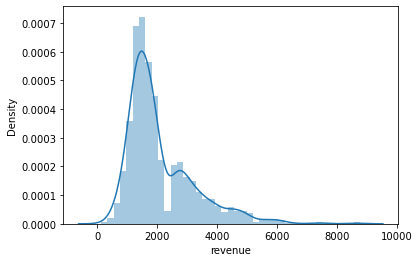

C:\Users\jacop\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


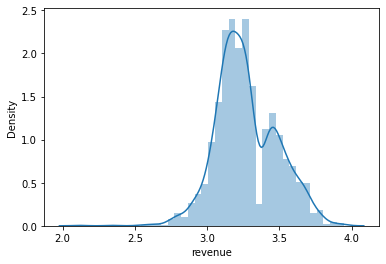

In [279]:
#DATA VISUALIZATION - Y
#plotting the distribution of our future Y
sns.distplot(a = df_work["revenue"])
plt.show()
#it looks skewed, a logarithmic transformation could help 

sns.distplot(a = Y_log)
plt.show()

C:\Users\jacop\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


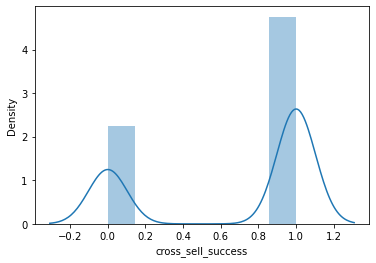

C:\Users\jacop\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


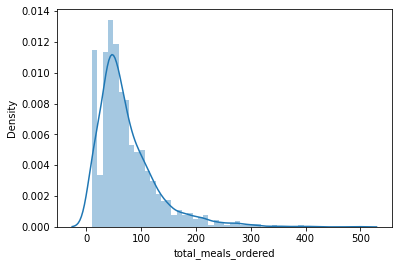

C:\Users\jacop\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


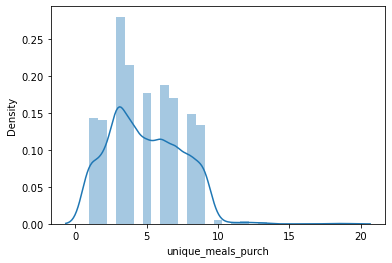

C:\Users\jacop\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


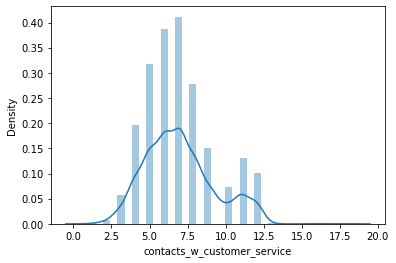

C:\Users\jacop\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


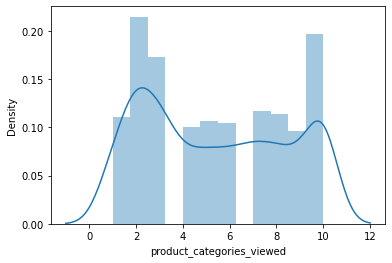

C:\Users\jacop\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


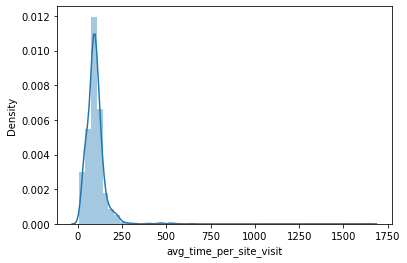

C:\Users\jacop\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


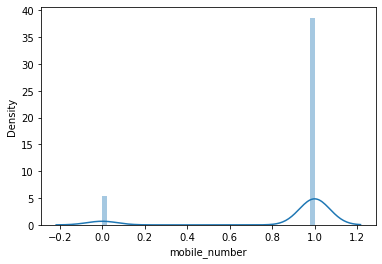

C:\Users\jacop\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


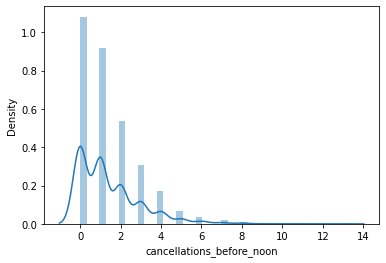

C:\Users\jacop\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


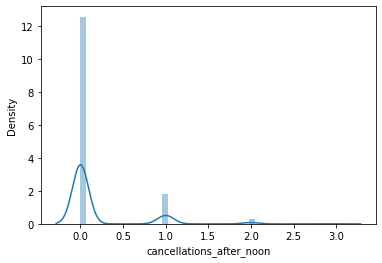

C:\Users\jacop\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


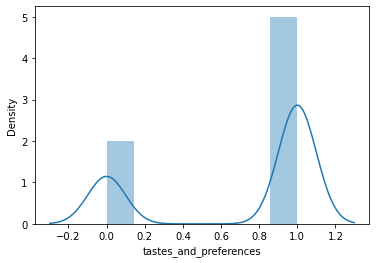

C:\Users\jacop\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


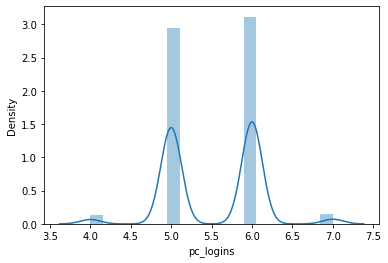

C:\Users\jacop\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


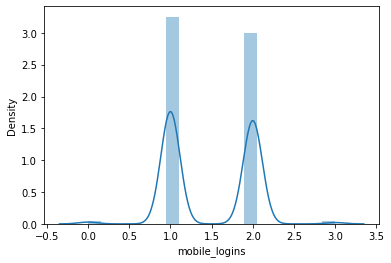

C:\Users\jacop\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


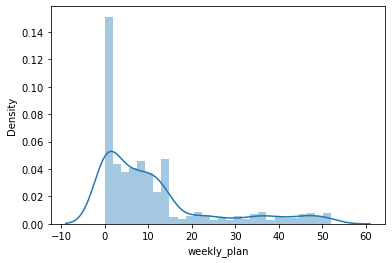

C:\Users\jacop\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


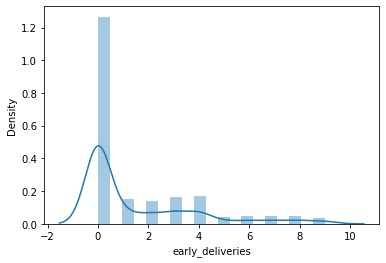

C:\Users\jacop\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


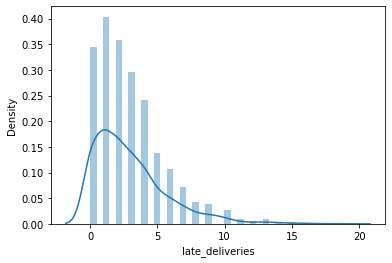

C:\Users\jacop\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


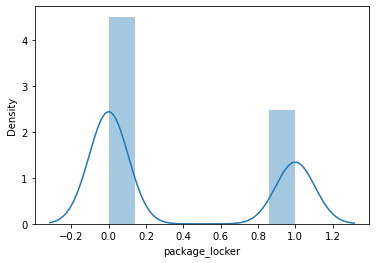

C:\Users\jacop\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


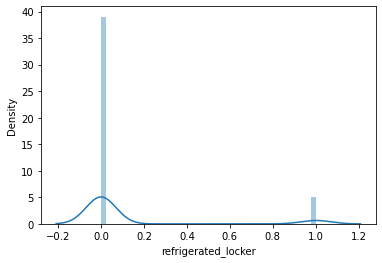

C:\Users\jacop\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


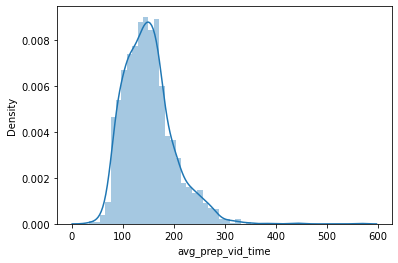

C:\Users\jacop\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


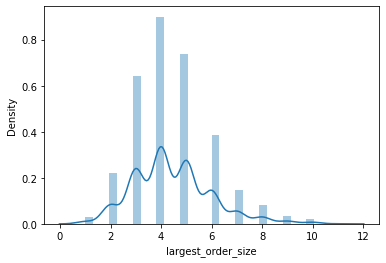

C:\Users\jacop\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


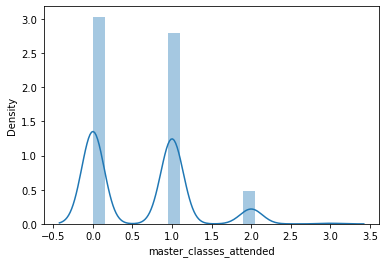

C:\Users\jacop\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


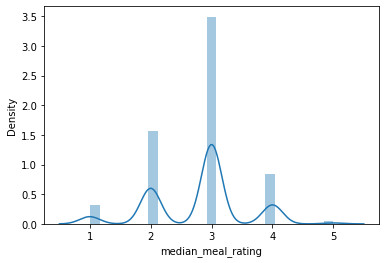

C:\Users\jacop\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


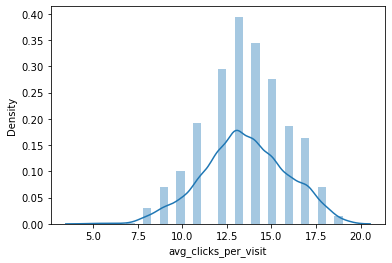

C:\Users\jacop\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


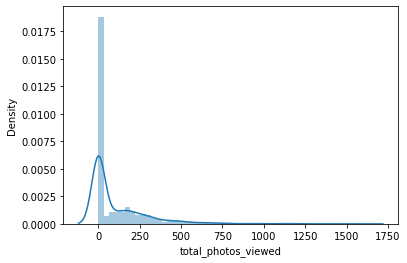

In [280]:
#DATA VISUALIZATION - DISTRIBUTION and DATA TYPE

for i in X:
    try:
        sns.distplot(a = df_work[i])
        plt.show()
    except:
        continue
    
#these plots helps us identify the different data types we are dealing with:

"""

CONTINUOUS
avg_time_per_site_visit                                            (!!skewed)
avg_prep_vid_time                                                  (!!skewed)
avg_clicks_per_visit                                                         (trends)

INTERVAL/COUNT
total_meals_ordered                                                (!!skewed)
unique_meals_purch
contacts_w_customer_service                                                  (trends)
product_categories_viewed                                                    (trends)
cancellations_before_noon                       (!!skewed) #transform in 0/1?
cancellations_after_noon                        (!!skewed) #transform in 0/1?
pc_logins                                                                    (trends)
mobile_logins                                                                (trends)
weekly_plan                                     (!!skewed) #transform in 0/1?(trends)
early_deliveries                                (!!skewed) #transform in 0/1?(trends)
late_deliveries                                 (!!skewed) #transform in 0/1?
largest_order_size                                                 (!!skewed)(trends)
master_classes_attended                         (!!skewed) #transform in 0/1?(trends) 
median_meal_rating                                                           (trends)
total_photos_viewed                                                (!!skewed)


CATEGORICAL
cross_sell_success
mobile_number
tastes_and_preferences
package_locker 
refrigerated_locker
domain_group                                               (!!create dummies)

"""

continuous_list = ["avg_time_per_site_visit", "avg_prep_vid_time",
                   "avg_clicks_per_visit"]

interval_list = ["total_meals_ordered", "unique_meals_purch", 
                 "contacts_w_customer_service", "product_categories_viewed", 
                 "cancellations_before_noon","cancellations_after_noon",
                 "pc_logins", "mobile_logins", "weekly_plan", 
                 "early_deliveries", "late_deliveries", "largest_order_size",
                 "master_classes_attended", "median_meal_rating",
                 "total_photos_viewed"]

categorical_list = ["cross_sell_success", "mobile_number", 
                    "tastes_and_preferences", "package_locker", 
                    "refrigerated_locker"]



categorical distributions:


 cross_sell_success :
 1: 1321   0: 625


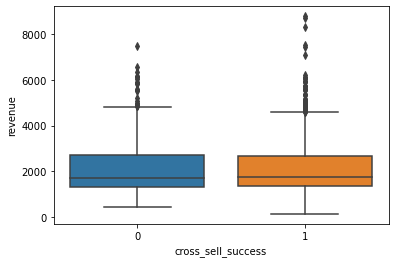



 mobile_number :
 1: 1708   0: 238


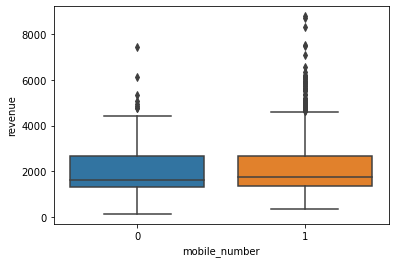



 tastes_and_preferences :
 1: 1390   0: 556


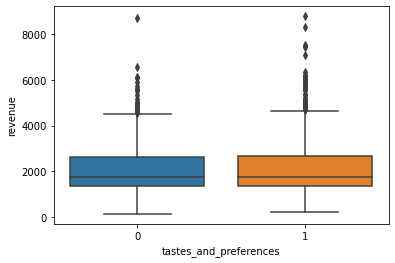



 package_locker :
 1: 691   0: 1255


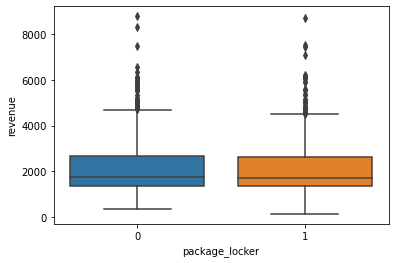



 refrigerated_locker :
 1: 220   0: 1726


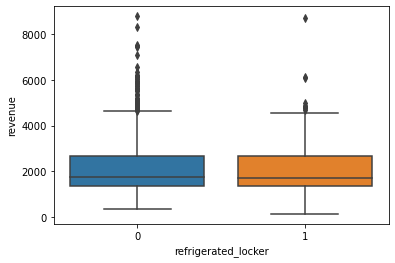

In [281]:
#DATA VISUALIZATION -  CATEGORIES
#veryfing the amounts of 0s and 1s in the categorical variables
print("categorical distributions:")
for i in categorical_list:
    print("\n\n",i,":")
    print(" 1:", sum(df_work[i]),"  0:", -sum(df_work[i])+ len(df_work[i]))
    sns.boxplot(x    = i,
            y    = 'revenue',
            data = df_work)
    plt.show()
#it seems enough values of 0s and 1s for every category

continuous:




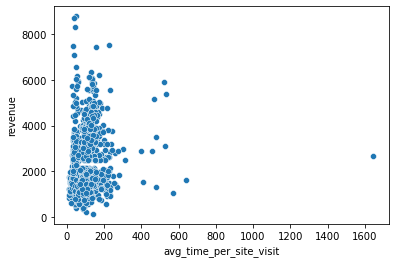

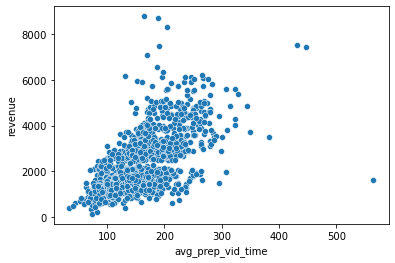

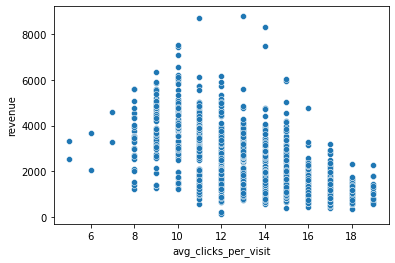





interval:




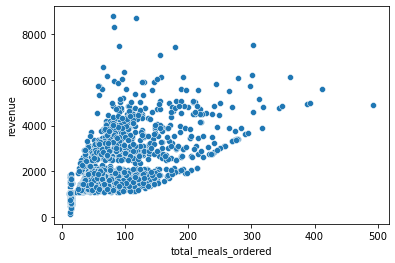

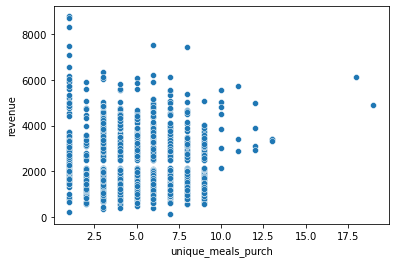

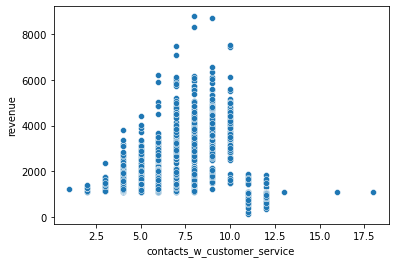

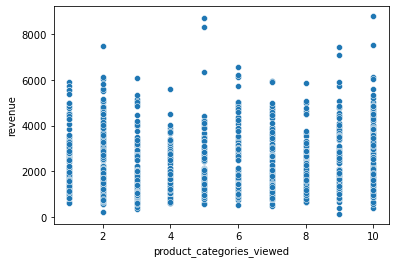

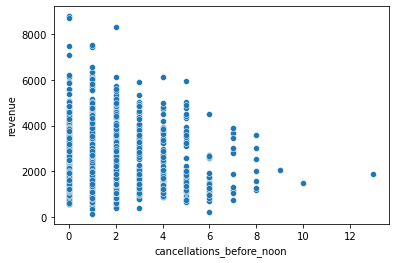

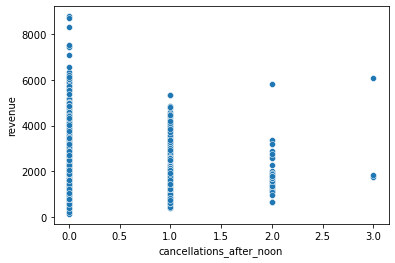

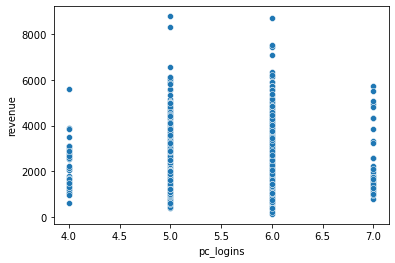

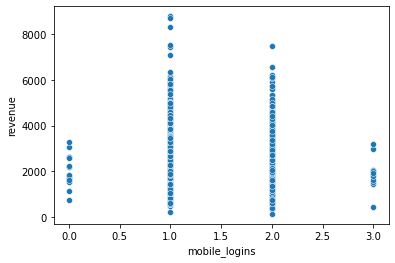

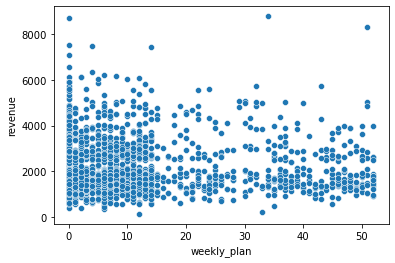

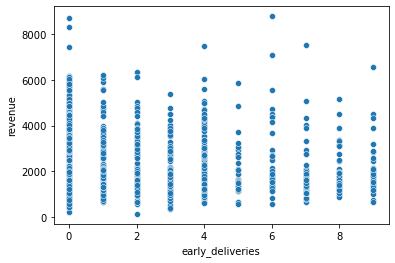

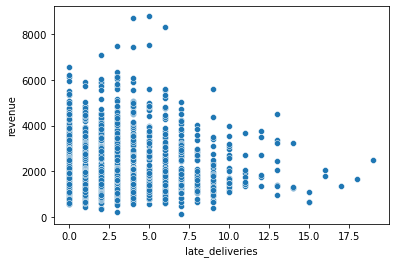

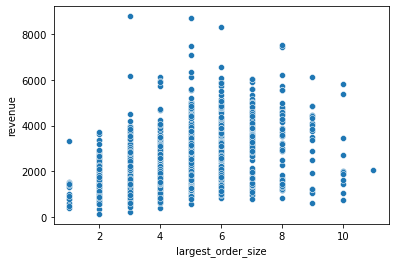

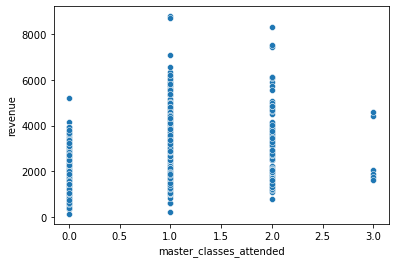

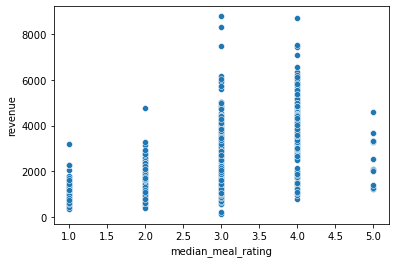

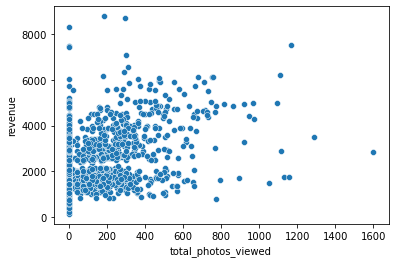

In [282]:
#DATA VISUALIZATION -  CONTINUOUS and INTERVAL vs Y
#veryfing the amounts of 0s and 1s in the categorical variables
print("continuous:\n\n")
for i in continuous_list:
    sns.scatterplot(x    = i,
                    y    = "revenue",
                    data = df_work)
    plt.show()

print("\n\n\n\ninterval:\n\n")
for i in interval_list:
    sns.scatterplot(x    = i,
                    y    = "revenue",
                    data = df_work)
    plt.show()

    
#in total photos viewed there are a lot of zeros, it may be helpful to add a 
#dummy variable 0/1 if no photo viewed

In [283]:
#VARIABLE AUGMENTATION
#creating all the log10 transformed new column that may come in handy in the
#creation of the model

#DUMMIES WHERE THE TRENDS SEEM TO CHANGE
df_work['avg_clicks_per_visit_11'] = 0
df_work.loc[df_work['avg_clicks_per_visit'] >11,'avg_clicks_per_visit_11'] = 1

df_work['contacts_w_customer_service_10'] = 0
df_work.loc[df_work['contacts_w_customer_service'] >10,'contacts_w_customer_service_10'] = 1

df_work['pc_logins_6'] = 0
df_work.loc[df_work['pc_logins'] >6,'pc_logins_6'] = 1

df_work['mobile_logins_1'] = 0
df_work.loc[df_work['mobile_logins'] >1,'mobile_logins_1'] = 1

df_work['early_deliveries_4'] = 0
df_work.loc[df_work['early_deliveries'] >4,'early_deliveries_4'] = 1

df_work['largest_order_size_6'] = 0
df_work.loc[df_work['largest_order_size'] >6,'largest_order_size_6'] = 1

df_work['master_classes_attended_1'] = 0
df_work.loc[df_work['master_classes_attended'] >1,'master_classes_attended_1'] = 1

df_work['weekly_plan_15'] = 0
df_work.loc[(df_work['weekly_plan'] >0)  & (df_work['weekly_plan'] <15) ,'weekly_plan_15'] = 1

#INFERENCES OF THE TRENDS
df_work['avg_clicks_per_visit_11_val'] = df_work['avg_clicks_per_visit_11']*df_work['avg_clicks_per_visit']
df_work['contacts_w_customer_service_10_val'] = df_work['contacts_w_customer_service_10']*df_work['contacts_w_customer_service']
df_work['pc_logins_6_val'] = df_work['pc_logins_6']*df_work['pc_logins']
df_work['mobile_logins_1_val'] = df_work['mobile_logins_1']*df_work['mobile_logins']
df_work['early_deliveries_4_val'] = df_work['early_deliveries_4']*df_work['early_deliveries']
df_work['largest_order_size_6_val'] = df_work['largest_order_size_6']*df_work['largest_order_size']
df_work['master_classes_attended_1_val'] = df_work['master_classes_attended_1']*df_work['master_classes_attended']
df_work['weekly_plan_15_val'] = df_work['weekly_plan_15']*df_work['weekly_plan']

#to avoid log(0) -> -inf we ad a small value to avoid the presence of 0 
#in an efficient way
eps = 0.0000000001

#CONTINUOUS - log
df_work['avg_time_per_site_visit_log'] = np.log10(df_work["avg_time_per_site_visit"]+ eps)
df_work['avg_prep_vid_time_log'] = np.log10(df_work["avg_prep_vid_time"]+ eps)
df_work['total_meals_ordered_log'] = np.log10(df_work["total_meals_ordered"]+ eps)

#INTERVAL/COUNT - log
df_work['cancellations_before_noon_log'] = np.log10(df_work["cancellations_before_noon"]+ eps)
df_work['cancellations_after_noon_log'] = np.log10(df_work["cancellations_after_noon"]+ eps)
df_work['weekly_plan_log'] = np.log10(df_work["weekly_plan"]+ eps)
df_work['early_deliveries_log'] = np.log10(df_work["early_deliveries"]+ eps)
df_work['late_deliveries_log'] = np.log10(df_work["late_deliveries"]+ eps)
df_work['largest_order_size_log'] = np.log10(df_work["largest_order_size"]+ eps)
df_work['master_classes_attended_log'] = np.log10(df_work["master_classes_attended"]+ eps)
df_work['total_photos_viewed_log'] = np.log10(df_work["total_photos_viewed"]+ eps)

#df_work = df_work.replace([np.inf, -np.inf], 0)
#INTERVAL/COUNT - 1/0
df_work['cancellations_before_noon_dummy'] = 0 
df_work.loc[df_work['cancellations_before_noon'] > 0, 
            'cancellations_before_noon_dummy'] = 1

df_work['cancellations_after_noon_dummy'] = 0
df_work.loc[df_work['cancellations_after_noon'] > 0, 
            'cancellations_after_noon_dummy'] = 1

df_work['weekly_plan_dummy'] = 0
df_work.loc[df_work['weekly_plan'] > 0, 
            'weekly_plan_dummy'] = 1

df_work['early_deliveries_dummy'] = 0
df_work.loc[df_work['early_deliveries'] > 0, 
            'early_deliveries_dummy'] = 1

df_work['late_deliveries_dummy'] = 0
df_work.loc[df_work['late_deliveries'] > 0, 
            'late_deliveries_dummy'] = 1

df_work['master_classes_attended_dummy'] = 0
df_work.loc[df_work['master_classes_attended'] > 0, 
            'master_classes_attended_dummy'] = 1

df_work['total_photos_viewed_dummy'] = 0
df_work.loc[df_work['total_photos_viewed'] > 0, 
            'total_photos_viewed_dummy'] = 1

#INTERVAL/COUNT - merging
df_work['cancellations_dummy'] = 0
df_work.loc[(df_work['cancellations_after_noon'] * df_work['cancellations_before_noon']) > 0, 
            'cancellations_dummy'] = 1

df_work['early_or_late_deliveries_dummy'] = 0
df_work.loc[(df_work['early_deliveries'] * df_work['late_deliveries'] > 0), 
            'early_or_late_deliveries_dummy'] = 1

df_work['early_delivery_with_refrigerated_dummy'] = df_work['early_deliveries'] * df_work['refrigerated_locker']
df_work['late_delivery_with_refrigerated_dummy'] = df_work['late_deliveries'] * df_work['refrigerated_locker']

df_work['early_delivery_with_refrigerated'] = df_work['early_deliveries'] * df_work['refrigerated_locker']
df_work['late_delivery_with_refrigerated'] = df_work['late_deliveries'] * df_work['refrigerated_locker']

df_work['early_delivery_with_locker_dummy'] = df_work['early_deliveries'] * df_work['package_locker']
df_work['late_delivery_with_locker_dummy'] = df_work['late_deliveries'] * df_work['package_locker']

df_work['early_delivery_with_locker'] = df_work['early_deliveries'] * df_work['package_locker']
df_work['late_delivery_with_locker'] = df_work['late_deliveries'] * df_work['package_locker']

#NEW VARIABLES
df_work['late_percentage'] = df_work['late_deliveries'] / df_work['total_meals_ordered']
df_work['early_percentage'] = df_work['early_deliveries'] / df_work['total_meals_ordered']
df_work['early_or_late_percentage'] = (df_work['late_deliveries'] + df_work['early_deliveries']) / df_work['total_meals_ordered']
df_work['complains_per_order'] = df_work['contacts_w_customer_service'] / df_work['total_meals_ordered']
df_work['total_logins'] = df_work['pc_logins'] + df_work['mobile_logins']
df_work['order_per_login'] = df_work['total_meals_ordered'] / df_work['total_logins']
df_work['categories_per_login'] = df_work['product_categories_viewed'] / df_work['total_logins']
df_work['photos_per_login'] = df_work['total_photos_viewed'] / df_work['total_logins']

df_work['one_meal'] = 0
df_work.loc[df_work['unique_meals_purch'] == 1, 'one_meal'] = 1


In [284]:
#CORRELATION ANALYSIS
# creating a (Pearson) correlation matrix
df_corr = df_work.corr().round(2)


# printing (Pearson) correlations with SalePrice
print(df_corr.loc['revenue'].sort_values(ascending = False))

revenue                               1.00
avg_prep_vid_time                     0.64
avg_prep_vid_time_log                 0.63
median_meal_rating                    0.61
total_meals_ordered_log               0.61
                                      ... 
contacts_w_customer_service_10_val   -0.36
complains_per_order                  -0.40
avg_clicks_per_visit_11              -0.49
avg_clicks_per_visit_11_val          -0.55
avg_clicks_per_visit                 -0.55
Name: revenue, Length: 78, dtype: float64


In [285]:
#HOT ENCODING 

# one hot encoding categorical variables
domain_group_dummies = pd.get_dummies(df_work['domain_group'])

# dropping categorical variables after they've been encoded
df_work = df_work.drop('domain_group', axis = 1)
df_work = df_work.drop('domain', axis = 1)

# joining codings together
df_work = df_work.join(domain_group_dummies)


In [286]:
#TRAIN AND TEST SPLIT
# preparing explanatory variable data
df_X   = df_work.drop(['revenue'],
                                axis = 1)

# preparing response variable data
df_Y = df_work.loc[ : , 'revenue']


from sklearn.model_selection import train_test_split
# preparing training and testing sets (all letters are lowercase)
X_train, X_test, Y_train, Y_test = train_test_split(df_X,df_Y,
                                                    test_size = 0.25,
                                                    random_state = 219)

# checking the shapes of the datasets
print(f"""
Training Data
-------------
X-side: {X_train.shape}
y-side: {Y_train.shape}


Testing Data
------------
X-side: {X_test.shape}
y-side: {Y_test.shape}
""")


##OUTLIERS REMOVAL 
##this part of the code is "turned off" for the purpose of the assingment
##the ouliers removal from the training set, if activated,  can increment up 
##to 2% the accuracy of the final model
#to activate outliers, put out_on = 1
out_on = 0
if out_on == 1:
    #calls of packages from sklearn
    from sklearn.ensemble import IsolationForest
    
    # identify outliers in the train dataset
    out_off = 0
    iso = IsolationForest(contamination=0.02, random_state=219 ) 
    out = iso.fit_predict(X_train)
    
    # select all rows that are not outliers
    mask = (out != -1)
    X_train = X_train.loc[mask, :]
    Y_train = Y_train[mask]
    print("after outsider removal:", sum(mask), "\nbefore outsider removal:", len(mask),"\n")
    
    # checking the shape of the updated train dataset
    print(f"""
    Training Data
    -------------
    X-side: {X_train.shape}
    y-side: {Y_train.shape}
    """)
else: 
    print('\033[93m'+"\n\nOutliers removal disabled\n(NOTE: outliers removal can increase models performance)"
     +'\033[0m')
         
        
        
df_train = X_train.join(Y_train)
df_test = X_test.join(Y_test)

df_train['revenue_log'] = np.log10(df_train["revenue"])
df_test['revenue_log'] = np.log10(df_test["revenue"])

Y_log_train = np.log10(Y_train)
Y_log_test = np.log10(Y_test)




Training Data
-------------
X-side: (1459, 80)
y-side: (1459,)


Testing Data
------------
X-side: (487, 80)
y-side: (487,)



Outliers removal disabled
(NOTE: outliers removal can increase models performance)


In [287]:
#the following lines of code were to help in writing down the factors for 
#the ols model that follows
#for i in df_train.columns:
#    print(i,"+ ", end = "")

In [288]:
#the following model is just an helpful framework for successive trial-and-errors
from sklearn.linear_model import LinearRegression

lm_full = smf.ols(formula = """revenue_log ~ cross_sell_success + 
total_meals_ordered + unique_meals_purch + contacts_w_customer_service + 
product_categories_viewed + avg_time_per_site_visit + mobile_number + 
cancellations_before_noon + cancellations_after_noon + tastes_and_preferences + 
pc_logins + mobile_logins + weekly_plan + early_deliveries + late_deliveries + 
package_locker + refrigerated_locker + avg_prep_vid_time + largest_order_size + 
master_classes_attended + median_meal_rating + avg_clicks_per_visit + 
total_photos_viewed + junk + personal + professional + 
avg_time_per_site_visit_log + avg_prep_vid_time_log + total_meals_ordered_log + 
cancellations_before_noon_log + cancellations_after_noon_log + weekly_plan_log + 
early_deliveries_log + late_deliveries_log + largest_order_size_log + 
master_classes_attended_log + total_photos_viewed_log +
cancellations_before_noon_dummy + 
cancellations_after_noon_dummy + weekly_plan_dummy + early_deliveries_dummy + 
late_deliveries_dummy + master_classes_attended_dummy + total_photos_viewed_dummy + 
cancellations_dummy + early_or_late_deliveries_dummy + 
early_delivery_with_refrigerated_dummy + 
late_delivery_with_refrigerated_dummy + early_delivery_with_refrigerated + 
late_delivery_with_refrigerated + early_delivery_with_locker_dummy + 
late_delivery_with_locker_dummy + early_delivery_with_locker + 
late_delivery_with_locker + late_percentage + early_percentage + 
early_or_late_percentage + complains_per_order + total_logins + 
order_per_login + categories_per_login + photos_per_login + got_gender + one_meal +
avg_clicks_per_visit_11 + contacts_w_customer_service_10 + pc_logins_6 + mobile_logins_1 + 
early_deliveries_4 + largest_order_size_6 + master_classes_attended_1+ weekly_plan_15 +
avg_clicks_per_visit_11 + contacts_w_customer_service_10_val + pc_logins_6_val + mobile_logins_1_val + 
early_deliveries_4_val + largest_order_size_6_val + master_classes_attended_1_val +
weekly_plan_15_val""",
                             data = df_train)

 
#telling Python to run the data through the blueprint
results_full = lm_full.fit()
 
#printing the results
results_full.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            revenue_log   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.812
Method:                 Least Squares   F-statistic:                     92.14
Date:                Sun, 17 Jan 2021   Prob (F-statistic):               0.00
Time:                        23:10:09   Log-Likelihood:                 1465.4
No. Observations:                1459   AIC:                            -2791.
Df Residuals:                    1389   BIC:                            -2421.
Df Model:                          69                                         
Covariance Type:            nonrobust                                         
==========================================================================================================
                                             coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
Intercept                                 -1.0940      1.972     -0.555      0.579      -4.963       2.775
cross_sell_success                        -0.0136      0.006     -2.413      0.016      -0.025      -0.003
total_meals_ordered                        0.0005      0.000      1.213      0.225      -0.000       0.001
unique_meals_purch                         0.0005      0.001      0.442      0.658      -0.002       0.003
contacts_w_customer_service                0.0241      0.002      9.741      0.000       0.019       0.029
product_categories_viewed                 -0.0083      0.007     -1.216      0.224      -0.022       0.005
avg_time_per_site_visit                -2.087e-05   6.22e-05     -0.335      0.737      -0.000       0.000
mobile_number                             -0.0004      0.007     -0.049      0.961      -0.015       0.014
cancellations_before_noon                  0.0079      0.006      1.220      0.223      -0.005       0.021
cancellations_after_noon                   0.1062      0.145      0.734      0.463      -0.178       0.390
tastes_and_preferences                     0.0045      0.005      0.838      0.402      -0.006       0.015
pc_logins                                 -0.0104      0.010     -1.066      0.287      -0.029       0.009
mobile_logins                              0.0228      0.018      1.245      0.213      -0.013       0.059
weekly_plan                               -0.0002      0.001     -0.398      0.691      -0.001       0.001
early_deliveries                           0.0252      0.020      1.279      0.201      -0.013       0.064
late_deliveries                            0.0017      0.003      0.603      0.547      -0.004       0.007
package_locker                             0.0080      0.009      0.844      0.399      -0.011       0.027
refrigerated_locker                       -0.0057      0.014     -0.412      0.680      -0.033       0.021
avg_prep_vid_time                          0.0003      0.000      1.241      0.215      -0.000       0.001
largest_order_size                        -0.0129      0.010     -1.262      0.207      -0.033       0.007
master_classes_attended                   -0.4775      0.674     -0.708      0.479      -1.800       0.845
median_meal_rating                         0.0510      0.007      7.531      0.000       0.038       0.064
avg_clicks_per_visit                       0.0021      0.002      0.921      0.357      -0.002       0.007
total_photos_viewed                      2.18e-05      0.000      0.165      0.869      -0.000       0.000
junk                                      -0.3692      0.657     -0.562      0.574      -1.659       0.920
personal                                  -0.3620      0.658     -0.550      0.582     

In [289]:
#ols moodel trained manually with backward elimination of the factors
lm = smf.ols(formula = """revenue_log ~ cross_sell_success + 
contacts_w_customer_service + avg_prep_vid_time + median_meal_rating + 
avg_time_per_site_visit_log + 
total_meals_ordered_log +  largest_order_size_log + 
total_photos_viewed_log + 
master_classes_attended_dummy + total_photos_viewed_dummy + categories_per_login + one_meal + 
avg_clicks_per_visit_11 + contacts_w_customer_service_10_val
 """,
                            data = df_train)

#in the following list there are stored the erased features due to their too
#high p-values
eliminated_for_p = ['avg_clicks_per_visit','cancellations_after_noon',
                  'early_delivery_with_refrigerated_dummy', 
                  'early_delivery_with_refrigerated', 'refrigerated_locker',
                 'early_percentage', 'early_or_late_percentage', 'cancellations_dummy',
                 'order_per_login', 'pc_logins_6_val', 'pc_logins_6', 'late_deliveries_dummy',
                 'unique_meals_purch', 'largest_order_size_6_val', 'largest_order_size_6',
                 'total_photos_viewed', 'photos_per_login', 'avg_prep_vid_time_log',
                 'weekly_plan', 'cancellations_after_noon_log', 'cancellations_after_noon_dummy',
                 'tastes_and_preferences', 'contacts_w_customer_service_10',
                 'late_delivery_with_refrigerated', 'late_delivery_with_refrigerated_dummy',
                 'mobile_logins', 'mobile_logins_1', 'pc_logins', 'mobile_logins_1_val',
                 'total_logins', 'product_categories_viewed', 'package_locker',
                 'early_deliveries_4', 'early_deliveries', 'early_deliveries_4_val',
                  'early_deliveries_log', 'complains_per_order', 'avg_time_per_site_visit',
                  'total_meals_ordered', 'late_deliveries', 'late_percentage',
                  'mobile_number', 'got_gender', 'weekly_plan_15', 'weekly_plan_log',
                  'weekly_plan_15_val', 'early_delivery_with_locker_dummy',
                  'early_delivery_with_locker', 'cancellations_before_noon_dummy',
                  'cancellations_before_noon_log', 'cancellations_before_noon',
                  'early_deliveries_dummy', 'late_deliveries_log', 'weekly_plan_dummy',
                  'late_delivery_with_locker_dummy', 'late_delivery_with_locker',
                  'avg_clicks_per_visit_11_val']

#after removing the factors with too high p-values, it follows the lists of
#redundant variables (ex: x, log(x))
#this created a ripple effect on new variables that increased their p-values
#and became unconsistent with the model
eliminated_for_redundancy = ['largest_order_size','master_classes_attended',
                            'master_classes_attended_1', 'personal', 
                             'master_classes_attended_log', 'professional',
                            'junk', 'master_classes_attended_1_val', 
                             'early_or_late_deliveries_dummy']


# telling Python to run the data through the blueprint
results = lm.fit()

# printing the results
results.summary()


#the following code helped in looking at the R-squared and p-values change 
#after every change we did to the model

#print("Old_R2: ",old_Rsq) 
#print("New_R2: ",results.rsquared)
#if (-old_Rsq + results.rsquared >= 0):
#    print("+ + + + + + + + ")
#else:
#    print("!!!")
#print(results.pvalues.sort_values(ascending=False))
#old_Rsq = results.rsquared 
#

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            revenue_log   R-squared:                       0.807
Model:                            OLS   Adj. R-squared:                  0.805
Method:                 Least Squares   F-statistic:                     430.0
Date:                Sun, 17 Jan 2021   Prob (F-statistic):               0.00
Time:                        23:10:09   Log-Likelihood:                 1410.0
No. Observations:                1459   AIC:                            -2790.
Df Residuals:                    1444   BIC:                            -2711.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
======================================================================================================
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
Intercept                              2.7877      0.112     24.885      0.000       2.568       3.007
cross_sell_success                    -0.0117      0.005     -2.261      0.024      -0.022      -0.002
contacts_w_customer_service            0.0229      0.002     12.958      0.000       0.019       0.026
avg_prep_vid_time                      0.0011    8.8e-05     12.907      0.000       0.001       0.001
median_meal_rating                     0.0477      0.005     10.080      0.000       0.038       0.057
avg_time_per_site_visit_log            0.0526      0.013      4.037      0.000       0.027       0.078
total_meals_ordered_log                0.1679      0.013     12.886      0.000       0.142       0.193
largest_order_size_log                -0.0521      0.024     -2.188      0.029      -0.099      -0.005
total_photos_viewed_log                0.0352      0.010      3.442      0.001       0.015       0.055
master_classes_attended_dummy          0.0382      0.006      6.707      0.000       0.027       0.049
total_photos_viewed_dummy             -0.4019      0.125     -3.211      0.001      -0.647      -0.156
categories_per_login                   0.0086      0.005      1.608      0.108      -0.002       0.019
one_meal                               0.2573      0.010     26.984      0.000       0.239       0.276
avg_clicks_per_visit_11               -0.0337      0.008     -4.376      0.000      -0.049      -0.019
contacts_w_customer_service_10_val    -0.0201      0.001    -14.164      0.000      -0.023      -0.017
==============================================================================
Omnibus:                      398.450   Durbin-Watson:                   2.073
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4290.671
Skew:                          -0.952   Prob(JB):                         0.00
Kurtosis:                      11.183   Cond. No.                     1.09e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.09e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [290]:
#LINEAR REGRESSION MODEL - 1

#removing the dropped columns according to the previous model
X_train_OLS_1_p =  X_train.drop(columns = eliminated_for_p)
X_test_OLS_1_p =  X_test.drop(columns = eliminated_for_p)

#after a first run, noticed that 'master_classes_attended_dummy' tends to 0
#removing the factor itself
X_train_OLS_1 =  X_train_OLS_1_p.drop(columns = ['master_classes_attended_dummy'])
X_test_OLS_1 =  X_test_OLS_1_p.drop(columns = ['master_classes_attended_dummy'])

# INSTANTIATING a model object
lr_1 = LinearRegression()

# FITTING to the training data
lr_1_fit = lr_1.fit(X_train_OLS_1, Y_log_train)

# PREDICTING on new data
lr_1_pred = lr_1_fit.predict(X_test_OLS_1)

# SCORING the results
print('OLS 1 Training Score :', lr_1.score(X_train_OLS_1, Y_log_train).round(4))  # using R-square
print('OLS 1 Testing Score  :',  lr_1.score(X_test_OLS_1, Y_log_test).round(4)) # using R-square

lr_1_train_score = lr_1.score(X_train_OLS_1, Y_log_train).round(4)
lr_1_test_score  = lr_1.score(X_test_OLS_1, Y_log_test).round(4)

# displaying and saving the gap between training and testing
print('OLS 1 Train-Test Gap :', abs(lr_1_train_score - lr_1_test_score).round(4))
lr_1_test_gap = abs(lr_1_train_score - lr_1_test_score).round(4)

# zipping each feature name to its coefficient
lr_1_model_values = zip(X_train_OLS_1.columns,
                      lr_1_fit.coef_.round(decimals = 3))


# setting up a placeholder list to store model features
lr_1_model_lst = [('intercept', lr_1_fit.intercept_.round(decimals = 3))]


# printing out each feature-coefficient pair one by one
for val in lr_1_model_values:
    lr_1_model_lst.append(val)
    

# checking the results
print("\n\n\ncoefficients:")
for pair in lr_1_model_lst:
    print(pair)

OLS 1 Training Score : 0.8117
OLS 1 Testing Score  : 0.8062
OLS 1 Train-Test Gap : 0.0055



coefficients:
('intercept', 2.952)
('cross_sell_success', -0.015)
('contacts_w_customer_service', 0.023)
('avg_prep_vid_time', 0.001)
('largest_order_size', -0.028)
('master_classes_attended', -0.136)
('median_meal_rating', 0.047)
('avg_clicks_per_visit_11', -0.033)
('master_classes_attended_1', 0.141)
('contacts_w_customer_service_10_val', -0.019)
('master_classes_attended_1_val', 0.003)
('avg_time_per_site_visit_log', 0.05)
('total_meals_ordered_log', 0.166)
('largest_order_size_log', 0.173)
('master_classes_attended_log', 0.017)
('total_photos_viewed_log', 0.037)
('total_photos_viewed_dummy', -0.429)
('early_or_late_deliveries_dummy', -0.013)
('categories_per_login', 0.009)
('one_meal', 0.257)
('junk', -0.004)
('personal', 0.002)
('professional', 0.003)


In [291]:
#LINEAR REGRESSION MODEL - 2  [CHOOSEN MODEL]

#removing the dropped columns according to the previous model
X_train_OLS_2_p =  X_train.drop(columns = eliminated_for_p)
X_test_OLS_2_p =  X_test.drop(columns = eliminated_for_p)
X_train_OLS_2 =  X_train_OLS_2_p.drop(columns = eliminated_for_redundancy)
X_test_OLS_2 =  X_test_OLS_2_p.drop(columns = eliminated_for_redundancy)


# INSTANTIATING a model object
lr_2 = LinearRegression()

# FITTING to the training data
lr_2_fit = lr_2.fit(X_train_OLS_2, Y_log_train)

# PREDICTING on new data
lr_2_pred = lr_2_fit.predict(X_test_OLS_2)

# SCORING the results
print('OLS 2 Training Score :', lr_2.score(X_train_OLS_2, Y_log_train).round(4))  # using R-square
print('OLS 2 Testing Score  :',  lr_2.score(X_test_OLS_2, Y_log_test).round(4)) # using R-square

lr_2_train_score = lr_2.score(X_train_OLS_2, Y_log_train).round(4)
lr_2_test_score  = lr_2.score(X_test_OLS_2, Y_log_test).round(4)

# displaying and saving the gap between training and testing
print('OLS 2 Train-Test Gap :', abs(lr_2_train_score - lr_2_test_score).round(4))
lr_2_test_gap = abs(lr_2_train_score - lr_2_test_score).round(4)


# zipping each feature name to its coefficient
lr_2_model_values = zip(X_train_OLS_2.columns,
                      lr_2_fit.coef_.round(decimals = 3))


# setting up a placeholder list to store model features
lr_2_model_lst = [('intercept', lr_2_fit.intercept_.round(decimals = 3))]


# printing out each feature-coefficient pair one by one
for val in lr_2_model_values:
    lr_2_model_lst.append(val)
    

# checking the results
print("\n\n\ncoefficients:")
for pair in lr_2_model_lst:
    print(pair)

OLS 2 Training Score : 0.8065
OLS 2 Testing Score  : 0.8058
OLS 2 Train-Test Gap : 0.0007



coefficients:
('intercept', 2.788)
('cross_sell_success', -0.012)
('contacts_w_customer_service', 0.023)
('avg_prep_vid_time', 0.001)
('median_meal_rating', 0.048)
('avg_clicks_per_visit_11', -0.034)
('contacts_w_customer_service_10_val', -0.02)
('avg_time_per_site_visit_log', 0.053)
('total_meals_ordered_log', 0.168)
('largest_order_size_log', -0.052)
('total_photos_viewed_log', 0.035)
('master_classes_attended_dummy', 0.038)
('total_photos_viewed_dummy', -0.402)
('categories_per_login', 0.009)
('one_meal', 0.257)


In [292]:
#LASSO REGRESSION MODEL
# INSTANTIATING a model object
lasso_model = sklearn.linear_model.Lasso() 


# FITTING to the training data
lasso_fit = lasso_model.fit(X_train, Y_train)


# PREDICTING on new data
lasso_pred = lasso_fit.predict(X_test)


# SCORING the results
print('Lasso Training Score :', lasso_model.score(X_train, Y_train).round(4))
print('Lasso Testing Score  :', lasso_model.score(X_test, Y_test).round(4))


## the following code has been provided for you ##

# saving scoring data for future use
lasso_train_score = lasso_model.score(X_train, Y_train).round(4) # using R-square
lasso_test_score  = lasso_model.score(X_test, Y_test).round(4)   # using R-square


# displaying and saving the gap between training and testing
print('Lasso Train-Test Gap :', abs(lasso_train_score - lasso_test_score).round(4))
lasso_test_gap = abs(lasso_train_score - lasso_test_score).round(4)

# zipping each feature name to its coefficient
lasso_model_values = zip(X_train.columns, lasso_fit.coef_.round(decimals = 3))


# setting up a placeholder list to store model features
lasso_model_lst = [('intercept', lasso_fit.intercept_.round(decimals = 3))]


# printing out each feature-coefficient pair one by one
for val in lasso_model_values:
    lasso_model_lst.append(val)
    

## checking the results
#print("\n\n\ncoefficients:")#
#for pair in lasso_model_lst:
#    print(pair)
#

Lasso Training Score : 0.7481
Lasso Testing Score  : 0.7553
Lasso Train-Test Gap : 0.0072


In [293]:
#LASSO REGRESSION MODEL (log)
# INSTANTIATING a model object
lasso_log_model = sklearn.linear_model.Lasso() 

# FITTING to the training data
lasso_log_fit = lasso_log_model.fit(X_train, Y_log_train)


# PREDICTING on new data
lasso_log_pred = lasso_log_fit.predict(X_test)


# SCORING the results
print('Lasso Training Score :', lasso_log_model.score(X_train, Y_log_train).round(4))
print('Lasso Testing Score  :', lasso_log_model.score(X_test, Y_log_test).round(4))


## the following code has been provided for you ##

# saving scoring data for future use
lasso_log_train_score = lasso_log_model.score(X_train, Y_log_train).round(4) # using R-square
lasso_log_test_score  = lasso_log_model.score(X_test, Y_log_test).round(4)   # using R-square


# displaying and saving the gap between training and testing
print('Lasso Train-Test Gap :', abs(lasso_log_train_score - lasso_log_test_score).round(4))
lasso_log_test_gap = abs(lasso_log_train_score - lasso_log_test_score).round(4)

# zipping each feature name to its coefficient
lasso_log_model_values = zip(X_train.columns, lasso_log_fit.coef_.round(decimals = 3))


# setting up a placeholder list to store model features
lasso_log_model_lst = [('intercept', lasso_log_fit.intercept_.round(decimals = 3))]


# printing out each feature-coefficient pair one by one
for val in lasso_log_model_values:
    lasso_log_model_lst.append(val)
    

# checking the results
print("\n\n\ncoefficients:")
for pair in lasso_log_model_lst:
    print(pair)

Lasso Training Score : 0.5231
Lasso Testing Score  : 0.5565
Lasso Train-Test Gap : 0.0334



coefficients:
('intercept', 2.948)
('cross_sell_success', -0.0)
('total_meals_ordered', 0.001)
('unique_meals_purch', -0.0)
('contacts_w_customer_service', -0.0)
('product_categories_viewed', 0.0)
('avg_time_per_site_visit', -0.0)
('mobile_number', 0.0)
('cancellations_before_noon', 0.0)
('cancellations_after_noon', -0.0)
('tastes_and_preferences', 0.0)
('pc_logins', -0.0)
('mobile_logins', -0.0)
('weekly_plan', 0.0)
('early_deliveries', -0.0)
('late_deliveries', -0.0)
('package_locker', -0.0)
('refrigerated_locker', -0.0)
('avg_prep_vid_time', 0.001)
('largest_order_size', 0.0)
('master_classes_attended', 0.0)
('median_meal_rating', 0.0)
('avg_clicks_per_visit', -0.0)
('total_photos_viewed', 0.0)
('got_gender', -0.0)
('avg_clicks_per_visit_11', -0.0)
('contacts_w_customer_service_10', -0.0)
('pc_logins_6', -0.0)
('mobile_logins_1', -0.0)
('early_deliveries_4', -0.0)
('largest_order_size_6', -0

In [294]:
#ARD REGRESSION MODEL
# INSTANTIATING a model object
ard_model = sklearn.linear_model.ARDRegression()


# FITTING the training data
ard_fit = ard_model.fit(X_train, Y_log_train)


# PREDICTING on new data
ard_pred = ard_fit.predict(X_test)


print('Training Score:', ard_model.score(X_train, Y_log_train).round(4))
print('Testing Score :', ard_model.score(X_test, Y_log_test).round(4))


# saving scoring data for future use
ard_train_score = ard_model.score(X_train, Y_log_train).round(4) # using R-square
ard_test_score  = ard_model.score(X_test, Y_log_test).round(4) # using R-square


# displaying and saving the gap between training and testing
print('ARD Train-Test Gap :', abs(ard_train_score - ard_test_score).round(4))
ard_test_gap = abs(ard_train_score - ard_test_score).round(4)

# zipping each feature name to its coefficient
ard_model_values = zip(X_train.columns, ard_fit.coef_.round(decimals = 3))


# setting up a placeholder list to store model features
ard_model_lst = [('intercept', ard_fit.intercept_.round(decimals = 3))]


# printing out each feature-coefficient pair one by one
for val in ard_model_values:
    ard_model_lst.append(val)
    

# checking the results
print("\n\n\ncoefficients:")
for pair in ard_model_lst:
    print(pair)

Training Score: 0.813
Testing Score : 0.8068
ARD Train-Test Gap : 0.0062



coefficients:
('intercept', 1.891)
('cross_sell_success', -0.011)
('total_meals_ordered', 0.0)
('unique_meals_purch', 0.0)
('contacts_w_customer_service', 0.023)
('product_categories_viewed', 0.0)
('avg_time_per_site_visit', 0.0)
('mobile_number', 0.0)
('cancellations_before_noon', 0.0)
('cancellations_after_noon', 0.0)
('tastes_and_preferences', 0.0)
('pc_logins', 0.0)
('mobile_logins', 0.0)
('weekly_plan', 0.0)
('early_deliveries', 0.0)
('late_deliveries', 0.0)
('package_locker', 0.0)
('refrigerated_locker', 0.0)
('avg_prep_vid_time', 0.0)
('largest_order_size', -0.014)
('master_classes_attended', 0.0)
('median_meal_rating', 0.046)
('avg_clicks_per_visit', 0.0)
('total_photos_viewed', 0.0)
('got_gender', 0.0)
('avg_clicks_per_visit_11', -0.037)
('contacts_w_customer_service_10', -0.002)
('pc_logins_6', 0.0)
('mobile_logins_1', 0.0)
('early_deliveries_4', 0.0)
('largest_order_size_6', 0.016)
('master_classes_a

In [295]:
#KNN REGRESSION MODEL 
# KNN libraries
from sklearn.neighbors import KNeighborsRegressor # KNN for Regression
from sklearn.preprocessing import StandardScaler # standard scaler

#scaling the test and the training datasets
sc = StandardScaler()
X_KNN_train = sc.fit_transform(X_train_OLS_2)
X_KNN_test = sc.transform(X_test_OLS_2)

#looking for the best values of K
#to accelerate the execution of the code, the final result (K=6) will be hard
#coded and the related code hidden in 
## creating lists for training set accuracy and test set accuracy
#training_accuracy = []
#test_accuracy     = []
#
## building a visualization of 1 to 50 neighbors
#neighbors_settings = range(1, 20)
#
#for n_neighbors in neighbors_settings:
#    # Building the model
#    clf = KNeighborsRegressor(n_neighbors = n_neighbors)
#    clf.fit(X_KNN_train, Y_train)
#    
#    # Recording the training set accuracy
#    training_accuracy.append(clf.score(X_KNN_train, Y_train))
#    
#    # Recording the generalization accuracy
#    test_accuracy.append(clf.score(X_KNN_test, Y_test))
#    
## finding the optimal number of neighbors
#for i in range(0,len(training_accuracy)):
#    if training_accuracy[i]-test_accuracy[i] < 0.05:
#        print("at K = ", i+1,"  Train-Test gap size = ", training_accuracy[i]-test_accuracy[i])
#        break
#        
## plotting the visualization
#fig, ax = plt.subplots(figsize=(12,8))
#plt.plot(neighbors_settings, training_accuracy, label = "training accuracy")
#plt.plot(neighbors_settings, test_accuracy, label = "test accuracy")
#plt.ylabel("Accuracy")
#plt.xlabel("n_neighbors")
#plt.legend()
#plt.show()
#
##at K =  11   Train-Test gap size =  0.0456

# INSTANTIATING a KNN model object
knn_reg = KNeighborsRegressor(algorithm = 'auto',
                              n_neighbors = 11)


# FITTING to the training data
knn_fit = knn_reg.fit(X = X_KNN_train, y = Y_log_train)


# PREDICTING on new data
knn_reg_pred = knn_fit.predict(X_KNN_test)


# SCORING the results
print('KNN Training Score:', knn_reg.score(X_KNN_train, Y_log_train).round(4))
print('KNN Testing Score :',  knn_reg.score(X_KNN_test, Y_log_test).round(4))


# saving scoring data for future use
knn_reg_score_train = knn_reg.score(X_KNN_train, Y_log_train).round(4)
knn_reg_score_test  = knn_reg.score(X_KNN_test, Y_log_test).round(4)


# displaying and saving the gap between training and testing
print('KNN Train-Test Gap:', abs(knn_reg_score_train - knn_reg_score_test).round(4))
knn_reg_test_gap = abs(knn_reg_score_train - knn_reg_score_test).round(4)

KNN Training Score: 0.8108
KNN Testing Score : 0.7652
KNN Train-Test Gap: 0.0456


In [296]:
#ACCURACY CROSS VALIDATION (disabled)

#to validate the models and choose through a stronger parameter, a cross
#validation with 10 iteration has been conducted for each model (the results 
#go beyond the scopes of the assignment)

#for speed reasons, the sequent code has been "turned off" with ##
#
#from sklearn.model_selection import cross_val_score
#accuracies_lr_1 = cross_val_score(estimator = lr_1, X = X_train_OLS_1_p, y = Y_train, cv = 10)
#print("OLS 1 accuracy: {:.2f}%".format(accuracies_lr_1.mean()*100))
#print("OLS 1 standard deviation: {:.2f}%".format(accuracies_lr_1.std()*100))
#
#print('\n')
#
#from sklearn.model_selection import cross_val_score
#accuracies_lr_2 = cross_val_score(estimator = lr_2, X = X_train_OLS_2_p, y = Y_train, cv = 10)
#print("OLS 2 accuracy: {:.2f}%".format(accuracies_lr_2.mean()*100))
#print("OLS 2 standard deviation: {:.2f}%".format(accuracies_lr_2.std()*100))
#
#print('\n')
#
#from sklearn.model_selection import cross_val_score
#accuracies_lasso = cross_val_score(estimator = lasso_model, X = X_train, y = Y_train, cv = 10)
#print("Lasso accuracy: {:.2f}%".format(accuracies_lasso.mean()*100))
#print("Lasso standard deviation: {:.2f}%".format(accuracies_lasso.std()*100))
#
#print('\n')
#
#from sklearn.model_selection import cross_val_score
#accuracies_ard = cross_val_score(estimator = ard_model, X = X_train, y = Y_train, cv = 10)
#print("ARD accuracy: {:.2f}%".format(accuracies_ard.mean()*100))
#print("ARD standard deviation: {:.2f}%".format(accuracies_ard.std()*100))
#
#print('\n')
#
#from sklearn.model_selection import cross_val_score
#accuracies_knn = cross_val_score(estimator = knn_reg, X = X_KNN_train, y = Y_train, cv = 10)
#print("KNN accuracy: {:.2f}%".format(accuracies_knn.mean()*100))
#print("KNN standard deviation: {:.2f}%".format(accuracies_knn.std()*100))

In [297]:
#RESULT COMPARISON

#print(f"""
#Model       Train Score      Test Score
#-----       -----------      ----------
#OLS 1         {lr_1_train_score}            {lr_1_test_score}
#OLS 2         {lr_2_train_score}            {lr_2_test_score}
#Lasso       {lasso_train_score}            {lasso_test_score}
#Lasso log   {lasso_log_train_score}            {lasso_log_test_score}
#ARD         {ard_train_score}            {ard_test_score}
#KNN         {knn_train_score}            {knn_test_score}
#""")

#creating a function to count the coefficients != 0 to asses the size of the models
def coef_counter(model_lst):
    coef=0
    for i in model_lst:
        if i[1] != 0:
            coef += 1
    return coef

# creating a dictionary for model results
model_performance = {
    
    'Model Type'    : ['OLS 1', 'OLS 2', 'Lasso', 'Lasso log', 'ARD', 'KNN'],
           
    'Training' : [lr_1_train_score, lr_2_train_score, lasso_train_score,
                  lasso_log_train_score,ard_train_score, knn_reg_score_train],
           
    'Testing'  : [lr_1_test_score, lr_2_test_score, lasso_test_score, 
                  lasso_log_test_score, ard_test_score, knn_reg_score_test],
                    
    'Train-Test Gap' : [lr_1_test_gap, lr_2_test_gap, lasso_test_gap, 
                        lasso_log_test_gap, ard_test_gap, knn_reg_test_gap],
                    
    'Model Size' : [len(lr_1_model_lst), len(lr_2_model_lst), 
                    len(lasso_model_lst), len(lasso_log_model_lst),
                    len(ard_model_lst), 0],
    
    'Coef != 0' : [coef_counter(lr_1_model_lst), coef_counter(lr_2_model_lst), 
                   coef_counter(lasso_model_lst), coef_counter(lasso_log_model_lst),
                   coef_counter(ard_model_lst), 0],
    
                    
    'Model' : [lr_1_model_lst, lr_2_model_lst, lasso_model_lst, 
               lasso_log_model_lst, ard_model_lst, "NA"]}

#Sequent code to save the model performance in an excel, turned off with #
## converting model_performance into a DataFrame
#model_performance = pd.DataFrame(model_performance)
#
## sending model results to Excel
#model_performance.to_excel('./linear_model_performance.xlsx',
#                           index = False)


# converting model_performance into a DataFrame
model_performance = pd.DataFrame(model_performance)

#creating a function to highlight the choosen model
def style_selected_model(x):

    color = 'background-color: dodgerblue'
    df1 = pd.DataFrame('', index=x.index, columns=x.columns)
    df1.iloc[1, 0] = color
    return df1

#simplifying the name call of the model performance dataframe
show_df = model_performance.iloc[:,0:6]

#displaying the performance with color grading
display(show_df.style.\
       hide_index().\
       background_gradient(cmap='RdYlGn',subset= ['Training','Testing']).\
       background_gradient(cmap='RdYlGn_r',subset= ['Train-Test Gap',
                                                    'Model Size','Coef != 0']).\
       apply(style_selected_model, axis=None).\
       set_caption('Model table with color gradient').\
       set_precision(3))

#printing the specs of the choosen model
print("\n\nChoosen model:",'\033[1m'+'\033[94m' +" OLS 2"+'\033[0m')

print("""Smallest size, lowest Train-Test gap, third highest R-squared, lower correlations between variables than OLS 1.
Furthermore, a cross validation analysis with 10 iterations shows that this model has the lowest deviation of the R-squared (~8%) and the highest mean (~71%).
\n\n""")


print("Coefficients (sorted):")
for i in sorted(model_performance.iloc[0,6], key=lambda x: x[1], reverse = True):
    print('\033[1m' +i[0]+ '\033[0m',":", end= " ")
    if i[1] >= 0:
        print('\033[32m'+"+"+str(i[1])+ '\033[0m')
    elif i[1] < 0:
        print('\033[31m'+str(i[1])+ '\033[0m')
    else:
        print("something went wrong")
        


Model Type,Training,Testing,Train-Test Gap,Model Size,Coef != 0
OLS 1,0.812,0.806,0.005,23,23
OLS 2,0.806,0.806,0.001,15,15
Lasso,0.748,0.755,0.007,81,55
Lasso log,0.523,0.556,0.033,81,3
ARD,0.813,0.807,0.006,81,21
KNN,0.811,0.765,0.046,0,0




Choosen model:  OLS 2
Smallest size, lowest Train-Test gap, third highest R-squared, lower correlations between variables than OLS 1.
Furthermore, a cross validation analysis with 10 iterations shows that this model has the lowest deviation of the R-squared (~8%) and the highest mean (~71%).



Coefficients (sorted):
intercept : +2.952
one_meal : +0.257
largest_order_size_log : +0.173
total_meals_ordered_log : +0.166
master_classes_attended_1 : +0.141
avg_time_per_site_visit_log : +0.05
median_meal_rating : +0.047
total_photos_viewed_log : +0.037
contacts_w_customer_service : +0.023
master_classes_attended_log : +0.017
categories_per_login : +0.009
master_classes_attended_1_val : +0.003
professional : +0.003
personal : +0.002
avg_prep_vid_time : +0.001
junk : -0.004
early_or_late_deliveries_dummy : -0.013
cross_sell_success : -0.015
contacts_w_customer_service_10_val : -0.019
largest_order_size : -0.028
avg_clicks_per_visit_11 : -0.033
master_classes_attended : -0.136
total_photos_vi